In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
data = pd.read_csv('store_data.csv')

In [52]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9917 entries, 0 to 9916
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9917 non-null   int64  
 1   Order ID       9917 non-null   object 
 2   Order Date     9917 non-null   object 
 3   Ship Date      9917 non-null   object 
 4   Ship Mode      9917 non-null   object 
 5   Customer ID    9917 non-null   object 
 6   Customer Name  9917 non-null   object 
 7   Segment        9917 non-null   object 
 8   Country        9917 non-null   object 
 9   City           9917 non-null   object 
 10  State          9917 non-null   object 
 11  Postal Code    9917 non-null   int64  
 12  Region         9917 non-null   object 
 13  Product ID     9917 non-null   object 
 14  Category       9917 non-null   object 
 15  Sub-Category   9917 non-null   object 
 16  Product Name   9917 non-null   object 
 17  Sales          9917 non-null   object 
 18  Quantity

In [54]:
print(data.isnull().any())

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
Unnamed: 21       True
Unnamed: 22       True
Unnamed: 23       True
dtype: bool


In [55]:
data = data.iloc[:, :-3]

In [56]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

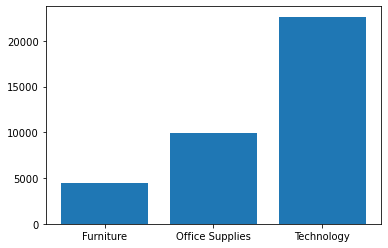

In [64]:
# function to drop rows with entry errors
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Apply the function to the 'Sales' column and filter the DataFrame
data = data[data['Sales'].apply(is_float)]

# Now, convert the 'Sales' column back to a float data type
data['Sales'] = data['Sales'].astype('float')
data = data.loc[~data['Quantity'].str.contains('20.7')]

# convert columns to desired data types
data['Sales'] = data['Sales'].astype('float')
data['Quantity'] = data['Quantity'].astype('int64')
data['Discount'] = data['Discount'].astype('float')
data['Profit'] = data['Profit'].astype('float')

# plot the bar chart
import matplotlib.pyplot as plt

plt.bar(data['Category'], data['Sales'])
plt.show()


Text(0.5, 1.0, 'Sales & Profit Average Over Time (per Month)')

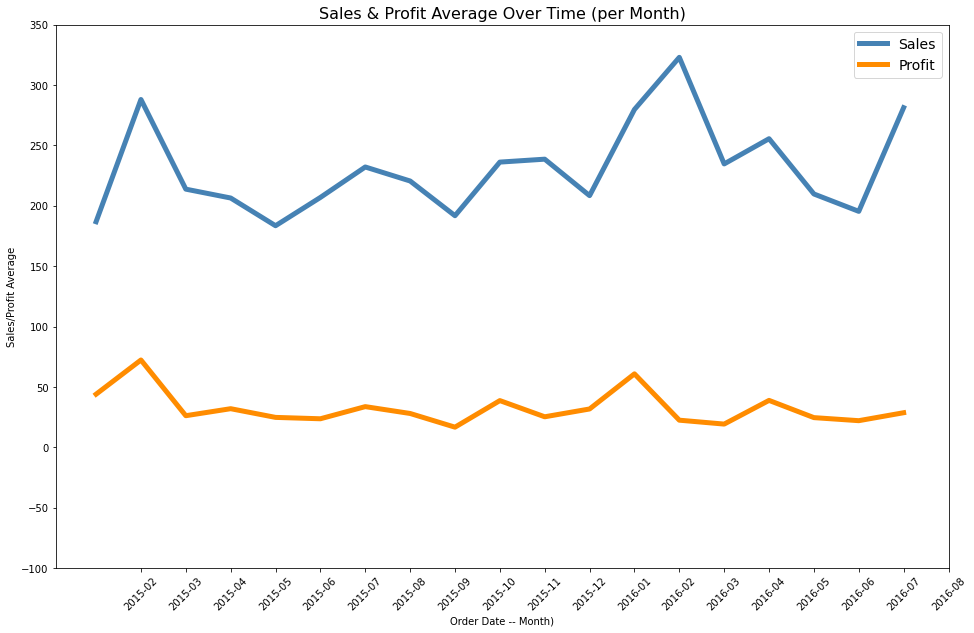

In [79]:
figure = plt.figure(figsize=(16,10))
time_data = data[['Order Date', 'Sales', 'Profit']].sort_values(by='Order Date')
time_data['Order Date'] = pd.to_datetime(time_data['Order Date'])
time_data['Month'] = time_data['Order Date'].dt.to_period('M')

# filter the data from 2014-12 to 2016-8
start_date = pd.to_datetime('2015-02')
end_date = pd.to_datetime('2016-08')
time_data_filtered = time_data[(time_data['Order Date'] >= start_date) & (time_data['Order Date'] <= end_date)]

time_data_avg = time_data_filtered.groupby('Month').agg({'Sales':'mean', 'Profit':'mean'}).reset_index()

plt.plot(time_data_avg.index, time_data_avg['Sales'], color='steelblue', label='Sales', linewidth=5)
plt.plot(time_data_avg.index, time_data_avg['Profit'], color='darkorange', label='Profit', linewidth=5)

plt.xlabel('Order Date -- Month)')
labels = time_data_avg['Month'].values
plt.xticks(range(1,time_data_avg.shape[0]+1), labels=labels)
plt.xticks(rotation=45)
plt.ylim([-100, 350])
plt.ylabel('Sales/Profit Average')
plt.legend(fontsize=14)
plt.title('Sales & Profit Average Over Time (per Month)', size=16)

Text(0.5, 1.0, 'Sales & Profit Average Over Time (per Month)')

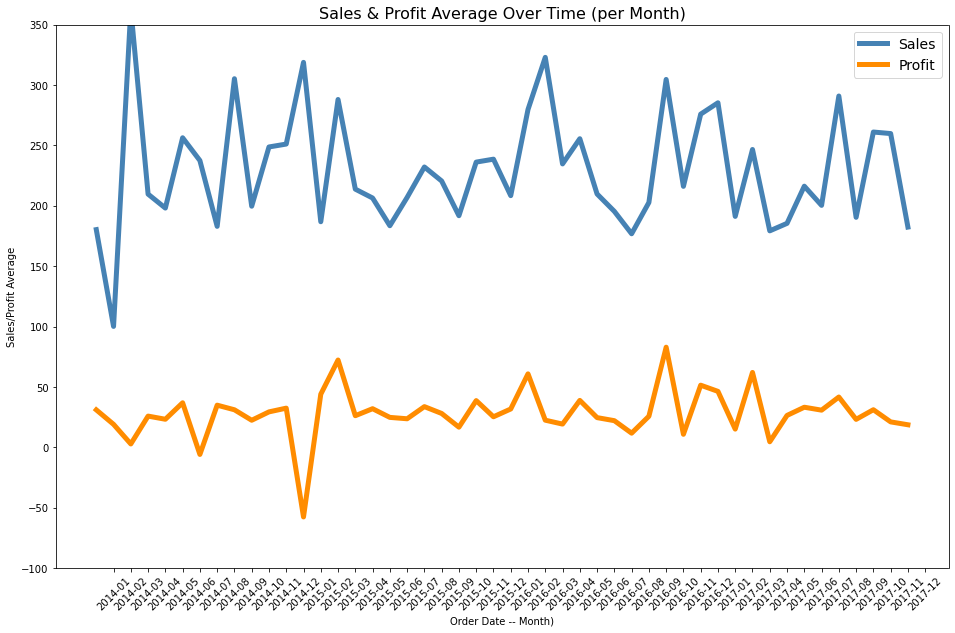

In [75]:
figure = plt.figure(figsize=(16,10))
time_data = data[['Order Date', 'Sales', 'Profit']].sort_values(by='Order Date')
time_data['Order Date'] = pd.to_datetime(time_data['Order Date'])
time_data['Month'] = time_data['Order Date'].dt.to_period('M')


time_data_avg = time_data.groupby('Month').agg({'Sales':'mean', 'Profit':'mean'}).reset_index()

plt.plot(time_data_avg.index, time_data_avg['Sales'], color='steelblue', label='Sales', linewidth=5)
plt.plot(time_data_avg.index, time_data_avg['Profit'], color='darkorange', label='Profit', linewidth=5)

plt.xlabel('Order Date -- Month)')
labels = time_data_avg['Month'].values
plt.xticks(range(1,time_data_avg.shape[0]+1), labels=labels)
plt.xticks(rotation=45)
plt.ylim([-100, 350])
plt.ylabel('Sales/Profit Average')
plt.legend(fontsize=14)
plt.title('Sales & Profit Average Over Time (per Month)', size=16)

Text(0.5, 1.0, 'Sales & Profit Average Over Time (per Year)')

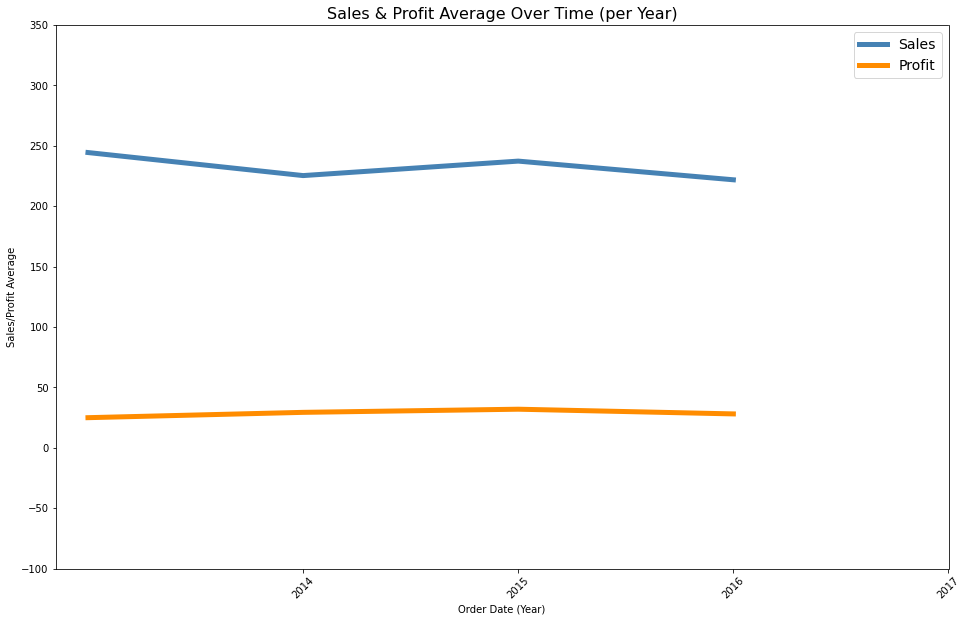

In [72]:
figure = plt.figure(figsize=(16,10))
time_data = data[['Order Date', 'Sales', 'Profit']].sort_values(by='Order Date')
time_data['Year'] = pd.to_datetime(data['Order Date']).dt.to_period('Y')

time_data_avg = time_data.groupby('Year').agg({'Sales':'mean', 'Profit':'mean'}).reset_index()


plt.plot(time_data_avg.index, time_data_avg['Sales'], color='steelblue', label='Sales', linewidth=5)
plt.plot(time_data_avg.index, time_data_avg['Profit'], color='darkorange', label='Profit', linewidth=5)

plt.xlabel('Order Date (Year)')
labels = time_data_avg['Year'].values
plt.xticks(range(1,time_data_avg.shape[0]+1), labels=labels)
plt.xticks(rotation=45)
plt.ylim([-100, 350])
plt.ylabel('Sales/Profit Average')
plt.legend(fontsize=14)
plt.title('Sales & Profit Average Over Time (per Year)', size=16)